# **Aprendizaje no supervisado**

## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Vamos a leer y realizar una exploración inicial de nuestros datos


In [49]:
df = pd.read_csv('/content/wine.csv',delimiter=";")
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Estadisticas básicas

In [50]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.531226e+04,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,7.399603e+05,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000e+00,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000e+00,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000e+00,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000e+00,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,9.899999e+06,1.710000,4.000000,1680.000000


#### Boxplots

In [51]:
print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


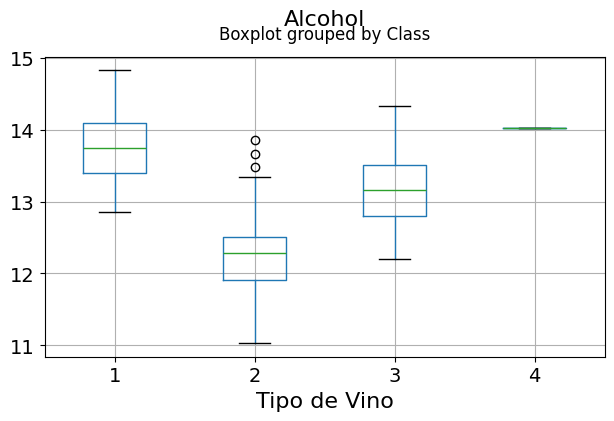

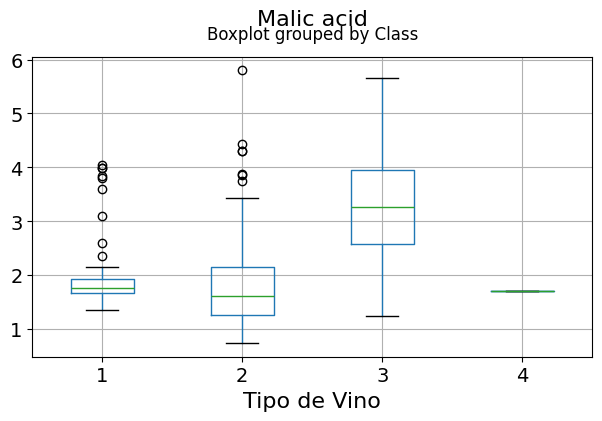

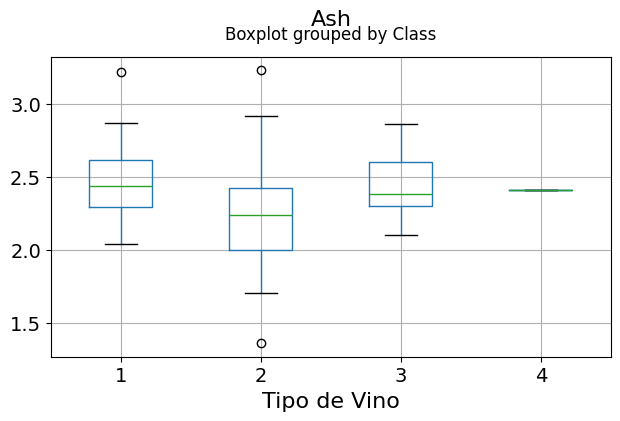

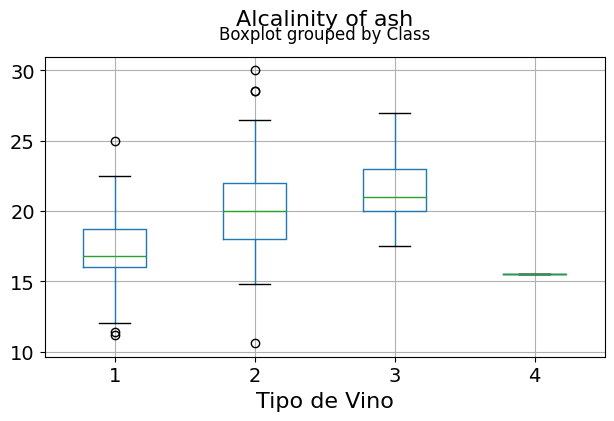

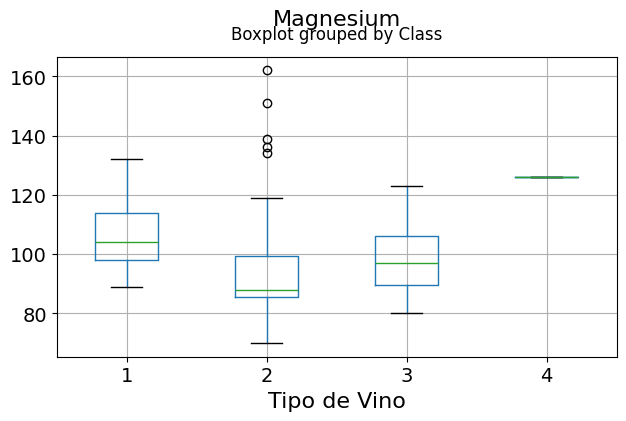

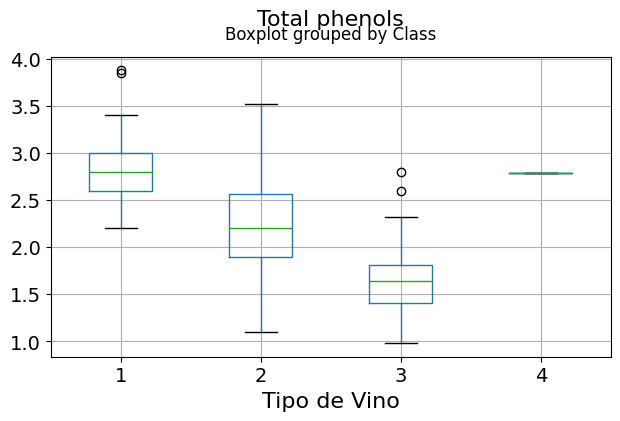

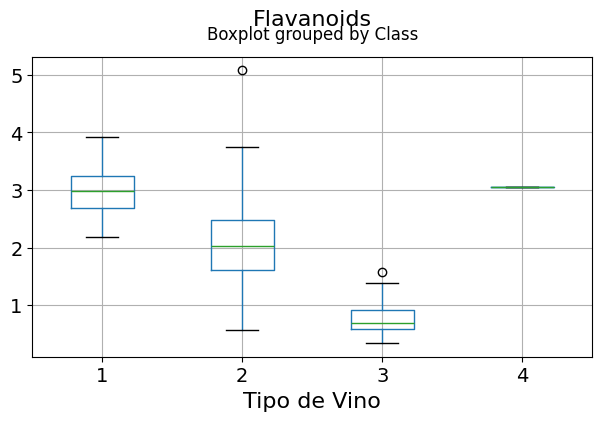

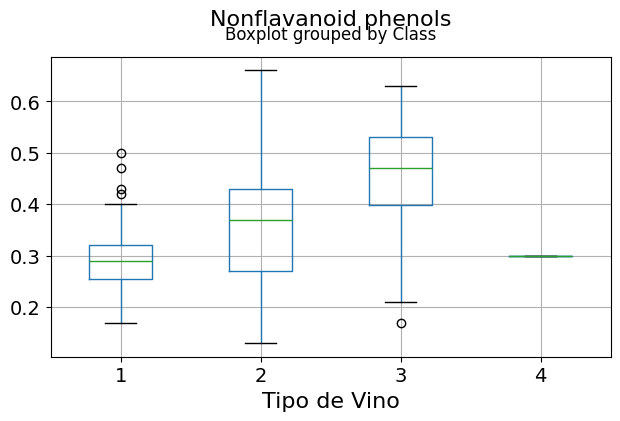

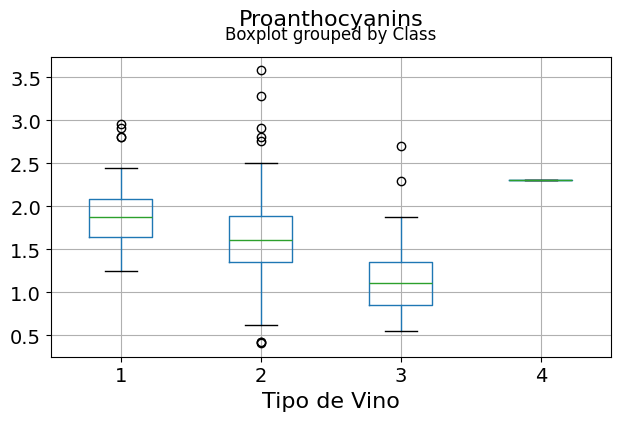

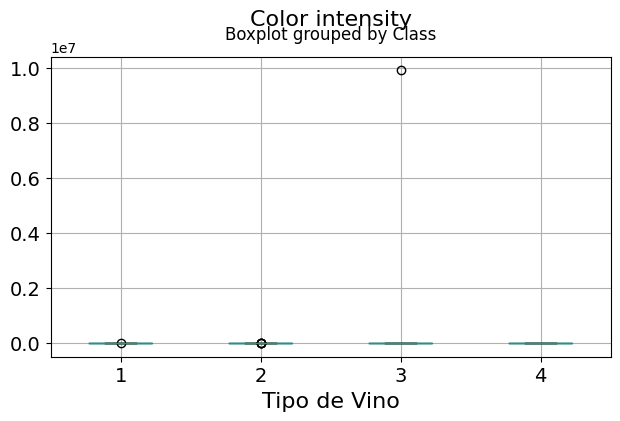

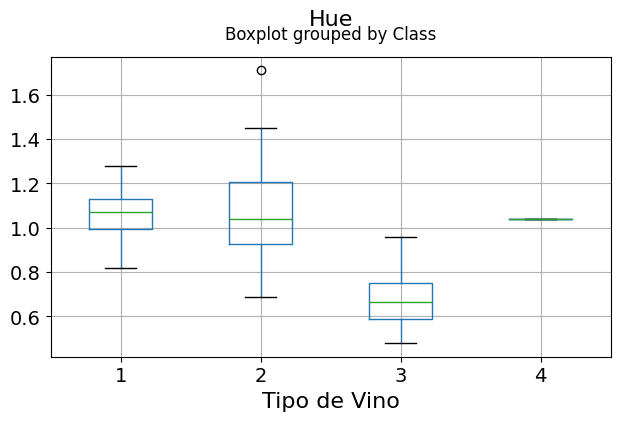

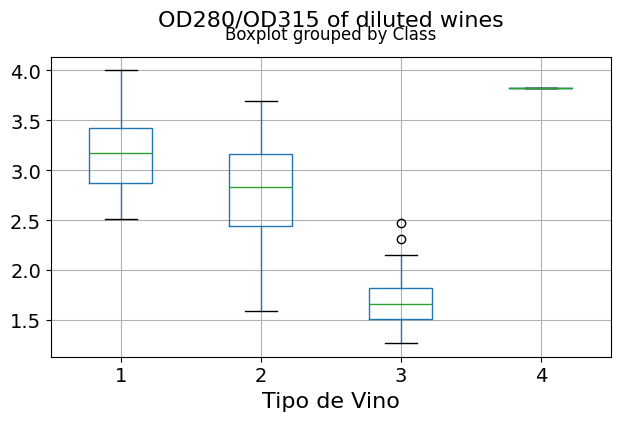

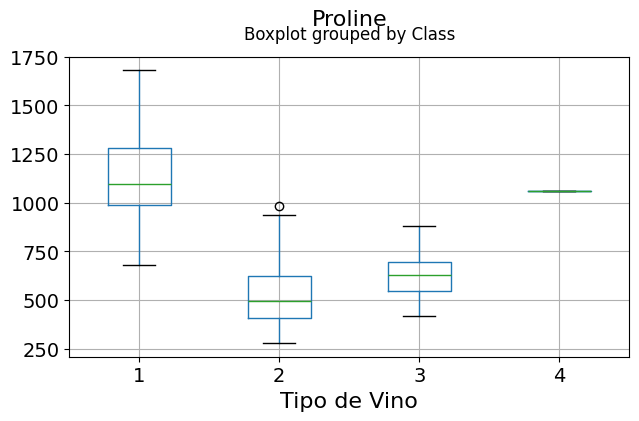

In [52]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Tipo de Vino", fontsize=16)

**Se puede ver que algunas características diferencian los tipos de vino de manera bastante clara**. Por ejemplo, la Alcalinidad, los Fenoles Totales o los Flavonoides producen diagramas de caja con medianas bien separadas, lo que indica claramente las clases de vino.

A continuación se muestra un ejemplo de separación de clases utilizando dos variables.

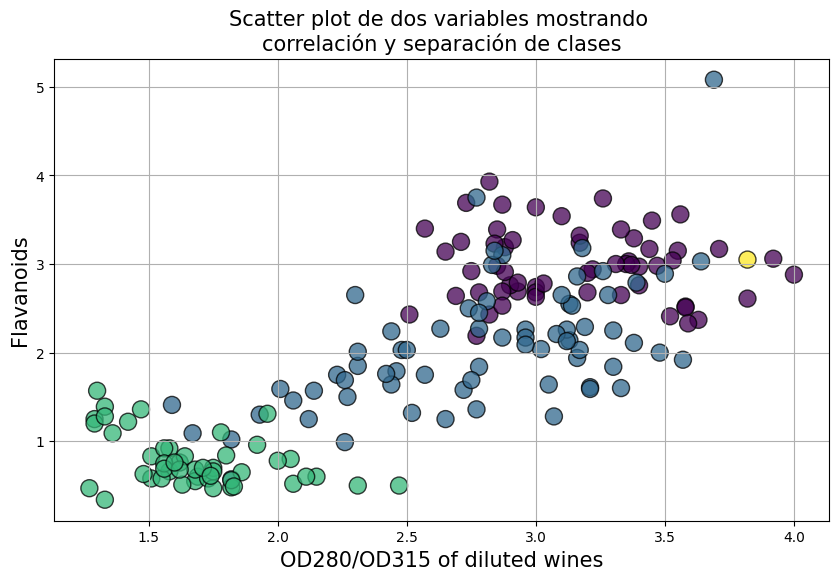

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Como sabes si todas las caracteristicas son independientes? *Una matrix de covariance*

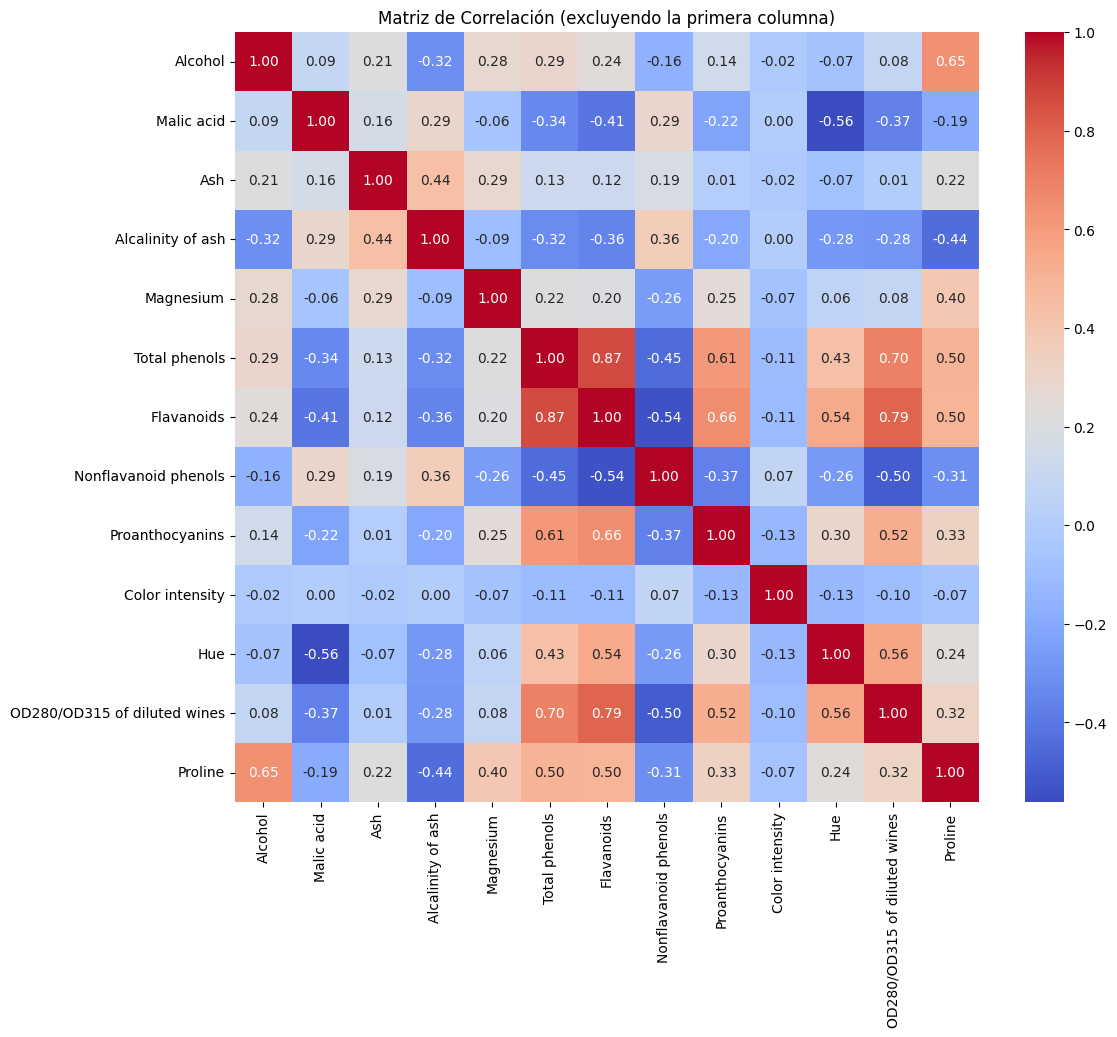

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()


Interpretación: Se puede observar que existe una buena correlación entre varias características, es decir, no son independientes entre sí, es decir, existe redundancia de información.

## Análisis de componentes principales


In [55]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

# **CODIGO DE KMEANS**

In [56]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

# **Para graficar en 2D Y 3D**

In [57]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c=df['Class'],edgecolors='k',alpha=0.75,s=150)
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c=df['Class'],edgecolors='k',alpha=0.75,s=150)
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [58]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


<ipython-input-59-4c3ec7613a18>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)


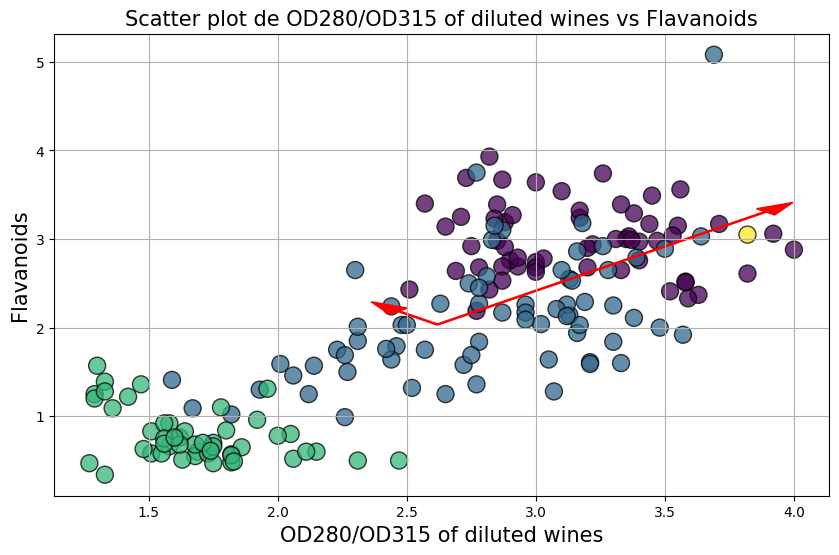

In [59]:
import matplotlib.pyplot as plt
import numpy as np

centroide = np.mean(nuevo_df, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['OD280/OD315 of diluted wines'],nuevo_df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Scatter plot de OD280/OD315 of diluted wines vs Flavanoids", fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines", fontsize=15)
plt.ylabel("Flavanoids", fontsize=15)

for i in range(pca.n_componentes):
  vector = pca.vectores_propios[:, i] * pca.valores_propios[i]
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)

plt.show()

### Normalización de datos
Recuerde que PCA requiere escalamiento/normalización de los datos para funcionar correctamente (eliminar la variabilidad de escala entre las caracteristicas)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)

[[ 1.50894906 -0.56018263  0.23179665 ...  0.36103193  1.82872312
   1.00739938]
 [ 0.23878087 -0.49722552 -0.8311507  ...  0.40501227  1.09811299
   0.95963215]
 [ 0.18945395  0.02441912  1.11147721 ...  0.31705159  0.77495851
   1.38953724]
 ...
 [ 0.20178568  0.2312782   0.01187651 ... -1.57410315 -1.40282168
   0.29089088]
 [ 1.38563176  1.58935303  1.36805071 ... -1.53012281 -1.43092207
  -0.60076413]
 [ 1.26231446 -0.56018263  0.15848993 ...  0.36103193  1.68822117
   0.99784593]]


In [61]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-1.786281e-15,-1.587805e-16,7.306384e-16,-2.381707e-16,-4.167988e-16,-3.572561e-16,1.190854e-16,-6.351220e-16,-1.984756e-16,-1.984756e-17,-1.190854e-16,-6.351220e-16,7.939025e-17
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-2.437205e+00,-1.432588e+00,-3.690113e+00,-2.661114e+00,-2.084740e+00,-2.113890e+00,-1.701485e+00,-1.869386e+00,-2.072880e+00,-7.495826e-02,-2.101867e+00,-1.894579e+00,-1.498788e+00
25%,-7.909186e-01,-6.546183e-01,-5.745772e-01,-6.966114e-01,-8.292201e-01,-8.868211e-01,-8.281420e-01,-7.389126e-01,-6.033235e-01,-7.495561e-02,-7.604668e-01,-9.461904e-01,-7.886486e-01
50%,5.380492e-02,-4.252745e-01,-2.477685e-02,8.210212e-03,-1.317088e-01,9.964584e-02,1.054315e-01,-1.736760e-01,-6.098718e-02,-7.495362e-02,5.316953e-02,2.270009e-01,-2.345487e-01
75%,8.368698e-01,6.584872e-01,6.899636e-01,6.080584e-01,5.309268e-01,8.054108e-01,8.532942e-01,5.934307e-01,6.300542e-01,-7.495159e-02,7.128747e-01,7.819836e-01,7.606020e-01
max,2.248853e+00,3.118311e+00,3.164065e+00,3.157413e+00,4.332363e+00,2.537743e+00,3.056728e+00,2.410262e+00,3.472946e+00,1.334166e+01,3.307715e+00,1.941125e+00,2.965856e+00


### Análisis de PCA

In [62]:
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [63]:
porcentaje_explicacion_varianza = pca.valores_propios/np.sum(pca.valores_propios) * 100

#### Grafica explicando el % de de explicación de la varianza de cada componente

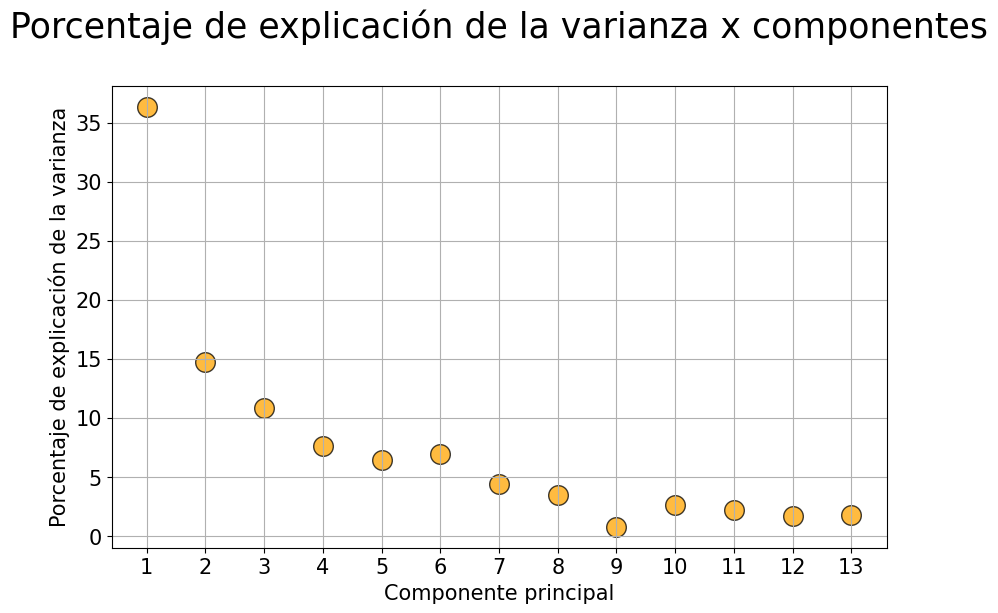

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(porcentaje_explicacion_varianza))],
            y=porcentaje_explicacion_varianza,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Porcentaje de explicación de la varianza x componentes\n",fontsize=25)
plt.xlabel("Componente principal",fontsize=15)
plt.xticks([i+1 for i in range(len(porcentaje_explicacion_varianza))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Porcentaje de explicación de la varianza",fontsize=15)
plt.show()

****La gráfica anterior indica que el primer componente principal explica aproximadamente el 36% de la varianza total de los datos y el segundo componente explica un 20% adicional. Por lo tanto, si solo consideramos los dos primeros componentes, juntos explican el 56 % de la varianza total.**

### Separación de tipos de vino utilizando solo los 2 mejores componentes

In [65]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1
0,3.378452,1.218487
1,2.161655,-0.719806
2,2.557438,0.932581
3,3.930659,2.029426
4,1.005144,1.496515
5,3.171907,1.574483
6,2.487096,0.896242
7,2.107593,1.780140
8,2.542909,0.410729
9,2.831646,-0.098878


#### Grafica de las dos columnas de este conjunto de datos transformados, con el color establecido en la etiqueta de clase de vino

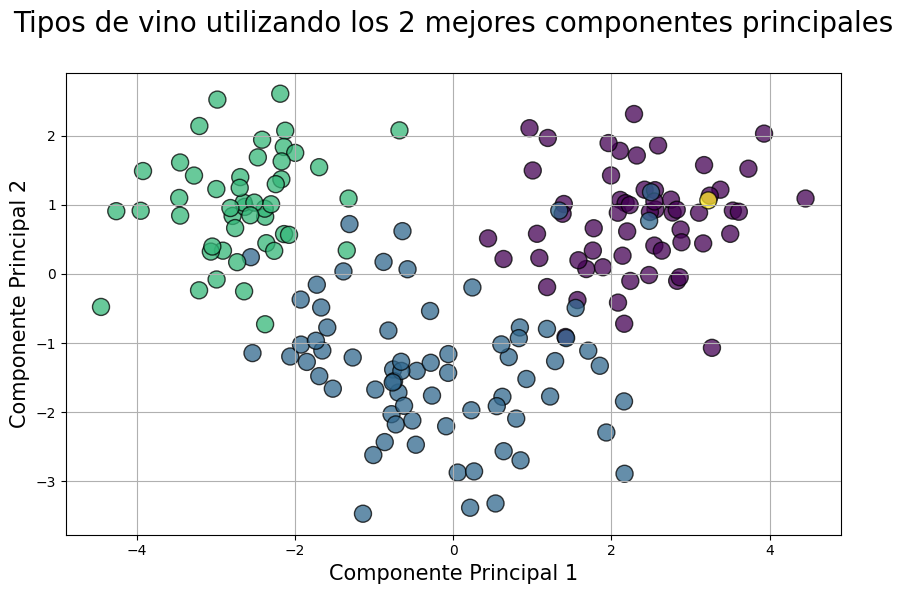

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

#**Taller**

1. La empresa Vinos Zungo SA ha liberado un nuevo tipo de vino a base de banano. Luego de llevarlo al laboratorio de analisis de alimento se determinó la siguiente composición para este número producto:

*   Alcohol = 14.03
*   Malic acid = 1.71
*   Ash = 2.41
*   Alcalinity of ash = 15.5
*   Magnesium = 126
*   Total phenols = 2.79
*   Flavanoids = 3.05
*   Nonflavanoid phenols = 0.3
*   Proanthocyanins = 2.3
*   Color intensity = 5.57
*   Hue = 1.04
*   D280/OD315 of diluted wines = 3.82
*  	Proline = 1062

Dado los resultados de laboratorio, a cual tipo de vino pertenece?

#**Tips!**

*  Utilice solo los 3 mejores componentes para realizar su análisis.
*  Utilice kmean para realizar la asignación de tipos de vino

#**Preguntas de interpretación**
*  A cual tipo de vino pertenece?
*  Cambian los resultados si utiliza los 2 **mejores** componentes?
*  Cambian los resultados si utiliza los 5 **mejores** componentes?
*  Cambian los resultados si utiliza los 3 **peores** componentes?

# **DESARROLLO DE LA ACTIVIDAD**

**Utilizando los 3 mejores componentes**

In [67]:
pca = PCA(n_componentes=3)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [68]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1,2
0,3.378452,1.218487,0.490993
1,2.161655,-0.719806,1.956214
2,2.557438,0.932581,-0.840332
3,3.930659,2.029426,0.546481
4,1.005144,1.496515,-1.622663
5,3.171907,1.574483,0.961693
6,2.487096,0.896242,1.232651
7,2.107593,1.780140,0.397401
8,2.542909,0.410729,1.891206
9,2.831646,-0.098878,0.839786


In [69]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = dfx_trans.values
print(points.shape)
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(kmeans.centroids)

(179, 3)
[[-0.03432999 -1.59761384 -0.65863181]
 [-2.47771533  0.74531716  0.30138664]
 [ 2.31418256  0.71082285  0.29846202]]


<ipython-input-57-244af3433ad3>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


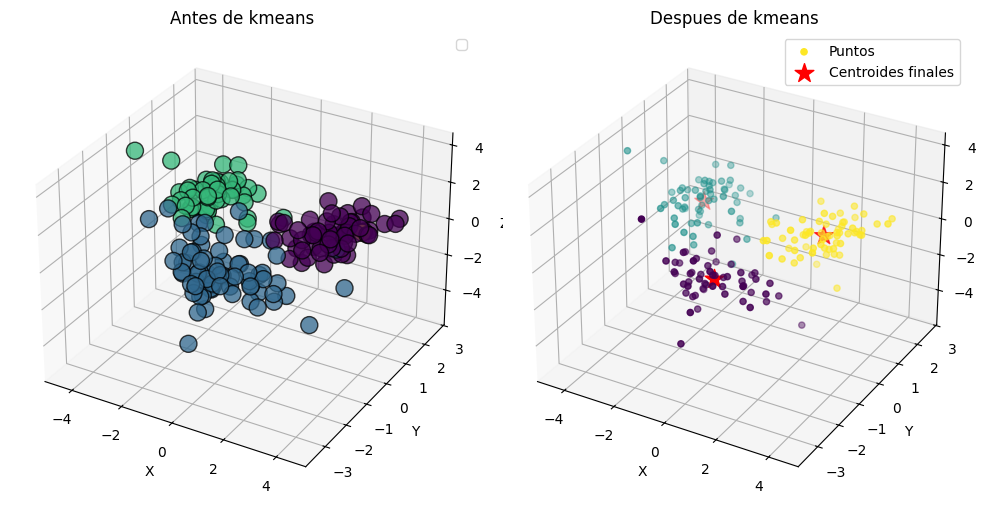

In [70]:
dibujar3D(points, kmeans.centroids, labels)

**Analisis utilizando los 3 mejores componentes:** *Utilizando los 3 mejores componente a simple vista no podemos identificar nuestro vino, pero aun asi la agrupacion es buena y bastante precisa*

**Utilizando los mejores 2 componentes**

In [71]:
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [72]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1
0,3.378452,1.218487
1,2.161655,-0.719806
2,2.557438,0.932581
3,3.930659,2.029426
4,1.005144,1.496515
5,3.171907,1.574483
6,2.487096,0.896242
7,2.107593,1.780140
8,2.542909,0.410729
9,2.831646,-0.098878


In [97]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = dfx_trans.values
#print(points)
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(kmeans.centroids)

[[-0.05676344 -1.55692652 -0.69491035  0.02330992 -0.20390656]
 [ 2.31418256  0.71082285  0.29846202 -0.07945358  0.11792178]
 [-2.49779599  0.74572671  0.35359173  0.06476489  0.07027034]]


<ipython-input-57-244af3433ad3>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


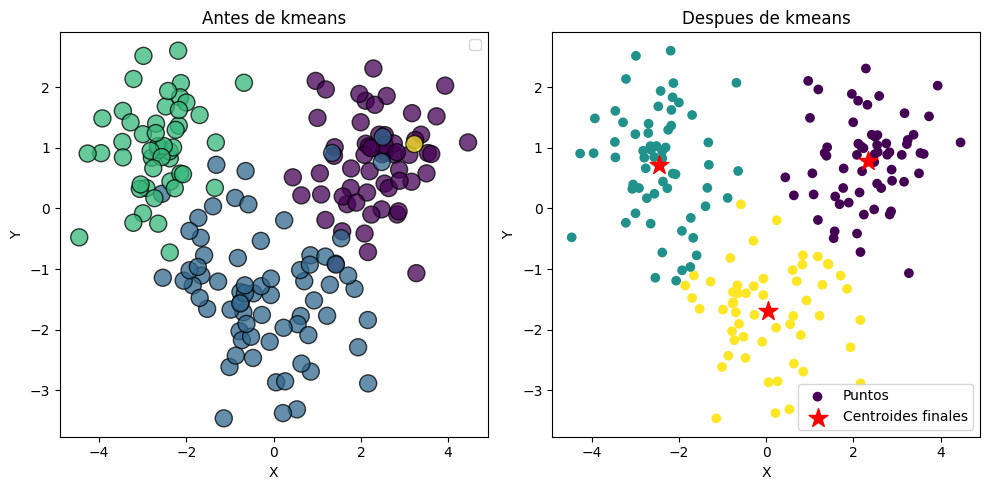

In [74]:
dibujar2D(points, kmeans.centroids, labels)

**Analisis utilizando los 2 mejores componentes:** *Utilizando los 2 mejores componentes a simple vista si podemos identificar nuestro vino, viendo que se clasifica en el **grupo 3.** Por otra parte analizando ambos graficos (antes del kmeans - despues del kmeans) el resultado es bueno, pero aun algunos datos (bastantes), se terminan ubicando en un grupo que no es el de su clase, pero sobre todo tiene a pasar con la clase 2, que se ubican en la clase 1*



**Probando los mejores 5 componentes**

In [86]:
pca = PCA(n_componentes=5)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2 3 5]


In [76]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1,2,3,4
0,3.378452,1.218487,0.490993,-0.001999,0.122391
1,2.161655,-0.719806,1.956214,0.133639,0.248361
2,2.557438,0.932581,-0.840332,-0.121847,-0.731256
3,3.930659,2.029426,0.546481,-0.157648,-0.648297
4,1.005144,1.496515,-1.622663,-0.347689,0.284769
5,3.171907,1.574483,0.961693,-0.235302,0.441580
6,2.487096,0.896242,1.232651,-0.111362,-0.008522
7,2.107593,1.780140,0.397401,-0.301659,0.999388
8,2.542909,0.410729,1.891206,0.096472,-0.073899
9,2.831646,-0.098878,0.839786,-0.063659,-0.318376


In [80]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = dfx_trans.values
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(kmeans.centroids)

[[-2.42800787  0.66458076  0.17130659  0.03986966  0.07350297]
 [ 0.06894911 -1.73093431 -0.48208642  0.07122879 -0.23278704]
 [ 2.2992014   0.71398557  0.21221681 -0.09453011  0.11140695]]


In [83]:
varianza_explicada = pca.valores_propios / np.sum(pca.valores_propios) * 100
print (varianza_explicada)

# Mostrar el porcentaje de varianza por componente con más claridad y sumar hasta el 90%
print("Porcentaje de varianza explicada por cada componente:")

for i, porcentaje in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {porcentaje:.2f}%")


[36.34934579 14.70908483 10.84599295  7.5899743   6.43952066  6.97408763
  4.42971936  3.47471591  0.79098396  2.6309989   2.2159179   1.73188499
  1.81777281]
Porcentaje de varianza explicada por cada componente:
Componente 1: 36.35%
Componente 2: 14.71%
Componente 3: 10.85%
Componente 4: 7.59%
Componente 5: 6.44%
Componente 6: 6.97%
Componente 7: 4.43%
Componente 8: 3.47%
Componente 9: 0.79%
Componente 10: 2.63%
Componente 11: 2.22%
Componente 12: 1.73%
Componente 13: 1.82%


**Analisis de los 5 mejores componentes** *Se nos hace dificil realizar el analisis con los cinco mejores componentes, pero hemos llegado a la conclusión que el resultado deberia ser mejor ya que con dos componetes se representa el 51.06%, en cambio con los mejores 5 componentes un 75.8% de los datos.*

**Los 3 peores componentes**

In [91]:
# Varianza explicada obtenida antes
varianza_explicada = pca.valores_propios / np.sum(pca.valores_propios) * 100

# Obtener los índices de las 3 peores columnas
indices_peores_3 = np.argsort(varianza_explicada)[:3]

# Filtrar X para obtener solo esas columnas
X_peores = X[:, indices_peores_3]

# Mostrar resultados
print(f"Índices de las peores columnas: {indices_peores_3 + 1}")  # +1 para que sea desde 1
print("Matriz con las peores columnas:")
#print(X_peores)


Índices de las peores columnas: [ 9 12 13]
Matriz con las peores columnas:


In [92]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = X_peores
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(kmeans.centroids)

[[-0.90618287 -1.17963088 -0.44279293]
 [ 0.58122806  0.74915724  1.2906446 ]
 [ 0.36999384  0.48815612 -0.69801721]]


<ipython-input-57-244af3433ad3>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


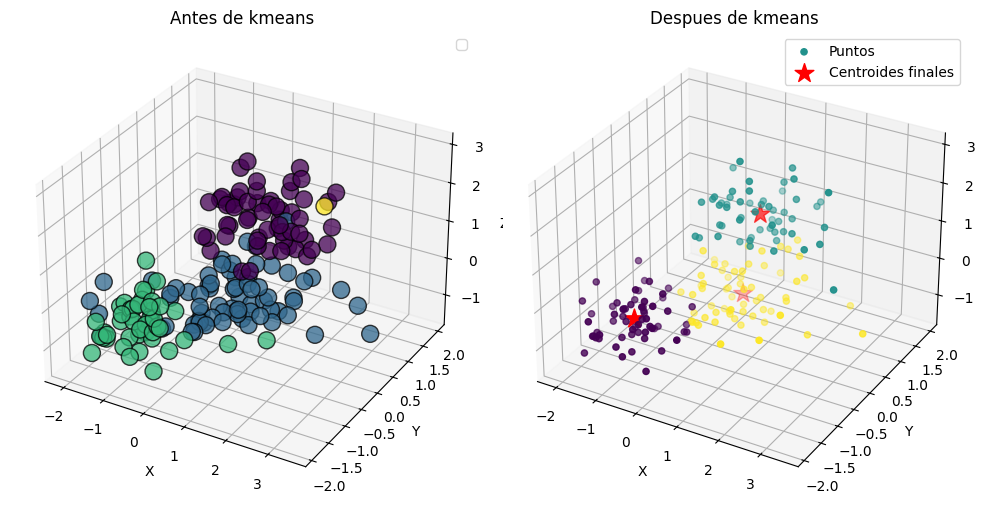

In [93]:
dibujar3D(points, kmeans.centroids, labels)

**Analisis con los 3 peores componentes:**
Podemos ver que no hay muchos cambios, se nota que el resultado no es tan preciso a cuando se utilizaron los 3 mejores componentes, ya que muchos datos se logra apreciar que quedan agrupado despues de Kmean en un grupo que no es el de el.

**Probando con los 2 peores componentes:**

In [95]:
# Varianza explicada obtenida antes
varianza_explicada = pca.valores_propios / np.sum(pca.valores_propios) * 100

# Obtener los índices de las 3 peores columnas
indices_peores_2 = np.argsort(varianza_explicada)[:2]

# Filtrar X para obtener solo esas columnas
X_peores = X[:, indices_peores_2]

# Mostrar resultados
print(f"Índices de las peores columnas: {indices_peores_2 + 1}")  # +1 para que sea desde 1
print("Matriz con las peores columnas:")
#print(X_peores)

Índices de las peores columnas: [ 9 12]
Matriz con las peores columnas:


<ipython-input-57-244af3433ad3>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


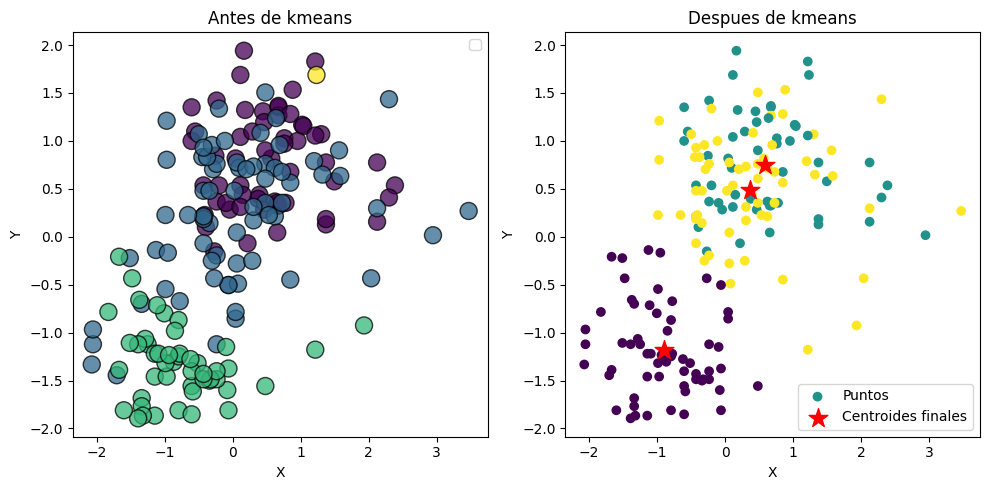

In [96]:
dibujar2D(points, kmeans.centroids, labels)

**Quisimos probar con los dos peores componentes, vemos que el resultado es muy malo, las clases estan muy dispersa y a siemple vista no podemos identificarla.**

# **Aunque cabe resalta, que con este kmeans que estamos usando aun los centroide son generado de manera aletoria, los que el resultado pueden variar un poco.**